In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/ecommerceDataset.csv', names = ['target', 'feature'])
df.head(3)

,target,feature
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


In [2]:
df.dropna(inplace=True)

In [6]:
df['feature'][0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis


# Application of TF-IDF Vectorization

- Extracted a maximum of 15000 features.
- We've set the ngram_range to (1,2) to consider both unigrams (single words) and bigrams (two-word sequences) when creating the TF IDF matrix.
- We set smooth idf to True, meaning: $ \text{IDF}(t) = \log\left(\frac{N}{\text{df}(t)}\right) + 1 $. This ensures that document frequencies with a value of 0 don't resolve into an undefined or infinite IDF.
- We set sublinear_tf to True, meaning that we apply logarithmic transformation to the TF values when computing the TF-IDF weights to make them less sensitive to extremely high term frequencies. $ \text{TF}(t, d) = 1 + \log(\text{TF}(t, d)) $

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=15000, smooth_idf=True, sublinear_tf=True)
df_feature = vectorizer.fit_transform(df['feature'])

In [13]:
from sklearn.model_selection import train_test_split

df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_feature, df['target'], test_size=0.2, random_state=42)

# Applied the Dummy Classifier for text classification

- 'uniform' is the default strategy
- set paramter strategy to 'prior' if you want to use the prior strategy 

In [14]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "prior")
dummy_model.fit(df_features_train, df_target_train)
target_prediction = dummy_model.predict(df_features_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(df_target_test, target_prediction))

                        precision    recall  f1-score   support

                 Books       0.00      0.00      0.00      2378
Clothing & Accessories       0.00      0.00      0.00      1750
           Electronics       0.00      0.00      0.00      2082
             Household       0.38      1.00      0.56      3875

              accuracy                           0.38     10085
             macro avg       0.10      0.25      0.14     10085
          weighted avg       0.15      0.38      0.21     10085



/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/makarwuckert/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [16]:
accuracy_score = accuracy_score(df_target_test, target_prediction)

In [17]:
accuracy_score

0.38423401090728804

array([[   0,    0,    0, 2378],
       [   0,    0,    0, 1750],
       [   0,    0,    0, 2082],
       [   0,    0,    0, 3875]])

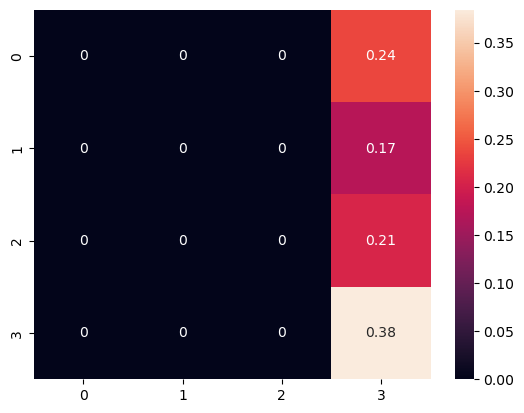

In [18]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_target_test, target_prediction)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True)
cf_matrix